In [2]:
pokemon<-read.csv("../data/pokemon.csv",sep=",",stringsAsFactors=F, header = TRUE)
combats<-read.csv("../data/combats.csv",sep=",",stringsAsFactors=F, header = TRUE)
#OBJ : Prédire la victoire d'un pokemon
#OB2 : Former une équipe optimale (min des chances de défaites) + Prédire la victoire d'une équipe de 6
#Voir ggplot

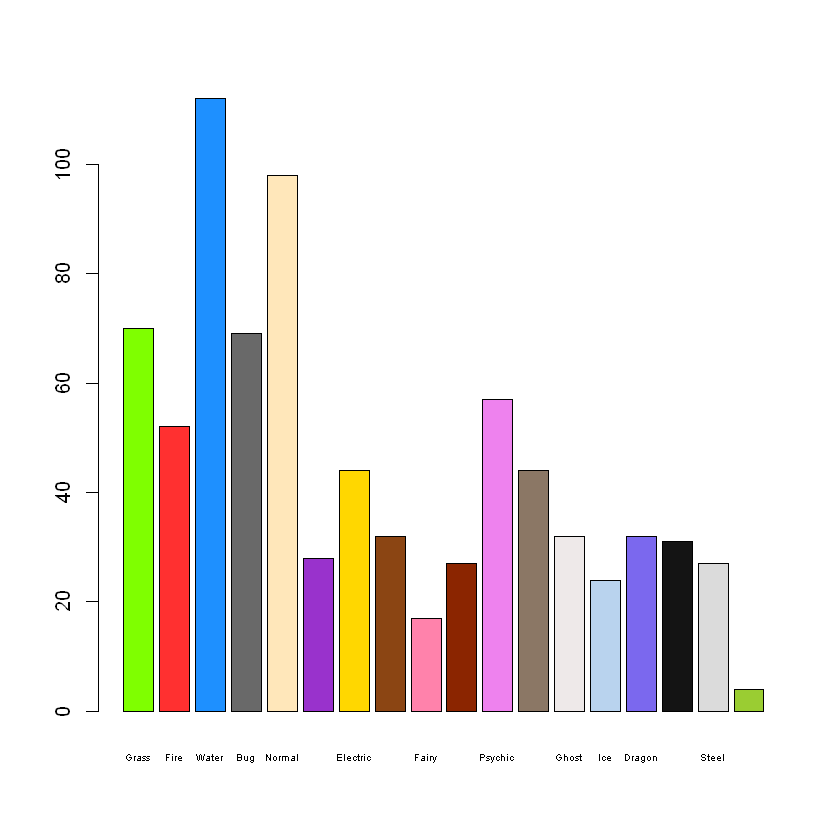

In [3]:
#Distribution du type de pokemon
Type <-as.factor(unique(pokemon$Type.1))
Color_type <-c("chartreuse","firebrick1","dodgerblue","dimgray","wheat1","darkorchid","gold","saddlebrown","palevioletred1","orangered4","violet","peachpuff4","snow2","slategray2","mediumslateblue","gray8","gray86","yellowgreen")
Effectif_type<-matrix(1,1)
for (i in 1:18)
{
  Effectif_type[i]<-length(pokemon$X.[pokemon$Type.1==Type[i]])
  
}
barplot(Effectif_type,names.arg =Type, col=Color_type,cex.names=0.5)


Warning message:
"package 'fmsb' was built under R version 3.4.4"

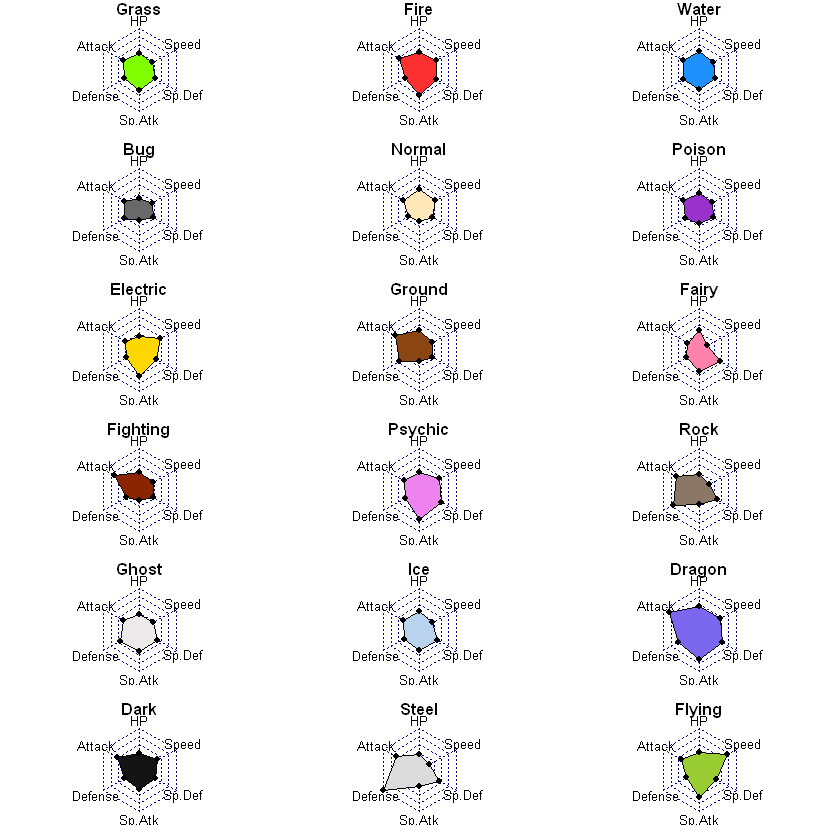

In [4]:
#Stats de chaque type de pokemon
library(fmsb)

Stats_type<-matrix(ncol=6,nrow=18)
names<-as.matrix(dimnames(pokemon)[2])

for (i in 1:length(Type))
{
  Stats_type[i,1]<-mean(pokemon$HP[pokemon$Type.1==Type[i]])
  Stats_type[i,2]<-mean(pokemon$Attack[pokemon$Type.1==Type[i]])
  Stats_type[i,3]<-mean(pokemon$Defense[pokemon$Type.1==Type[i]])
  Stats_type[i,4]<-mean(pokemon$Sp..Atk[pokemon$Type.1==Type[i]])
  Stats_type[i,5]<-mean(pokemon$Sp..Def[pokemon$Type.1==Type[i]])
  Stats_type[i,6]<-mean(pokemon$Speed[pokemon$Type.1==Type[i]])
}

par(mfrow=c(6,3))
par(mar=c(1,1,1,1))
dimnames(Stats_type)<-list(Type,c("HP","Attack","Defense","Sp.Atk","Sp.Def","Speed"))
Data<-data.frame(Stats_type)
for (i in 1:18)
{
    radarchart(rbind(max(Stats_type),min(Stats_type),Data[i,1:6]),pfcol=Color_type[i],title=Type[i])
}


#Dragon semble être le type le plus puissant et bug le plus faible
#Penser à enlever les légendaires

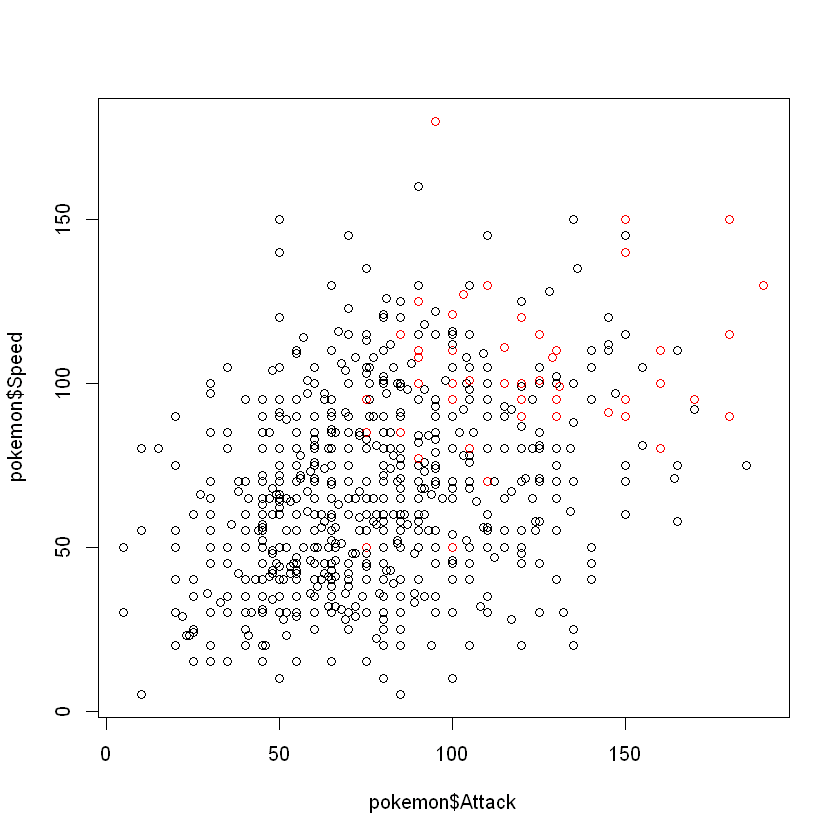

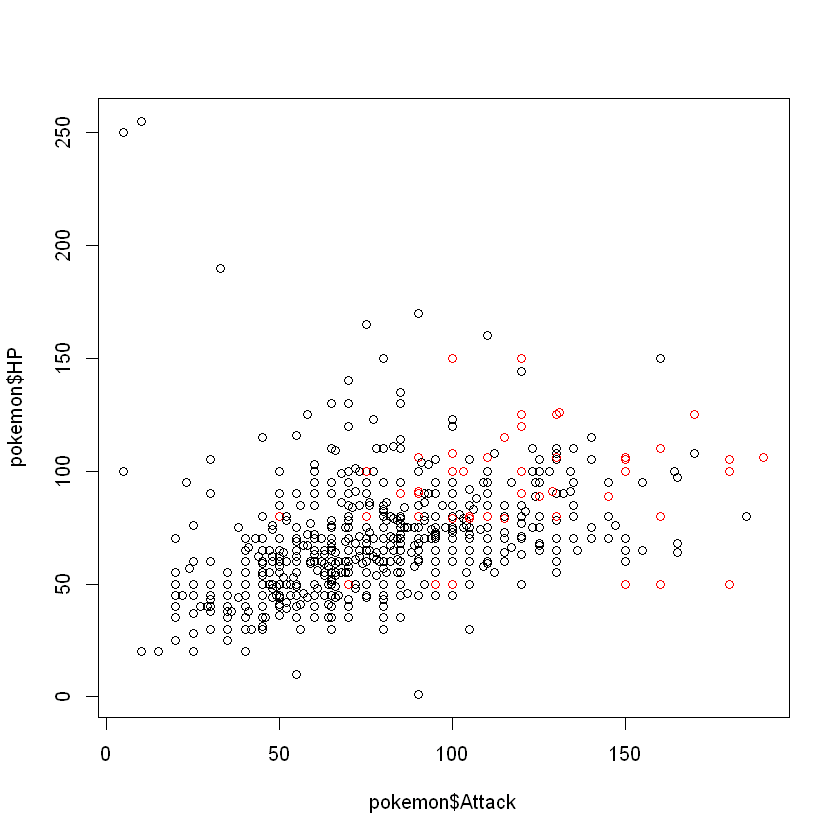

In [5]:
#Pokemon Légendaires (caractéristiques)

def.par <- par(no.readonly = T)

plot(pokemon$Attack,pokemon$Speed,col=as.factor(pokemon$Legendary))
plot(pokemon$Attack,pokemon$HP,col=as.factor(pokemon$Legendary))


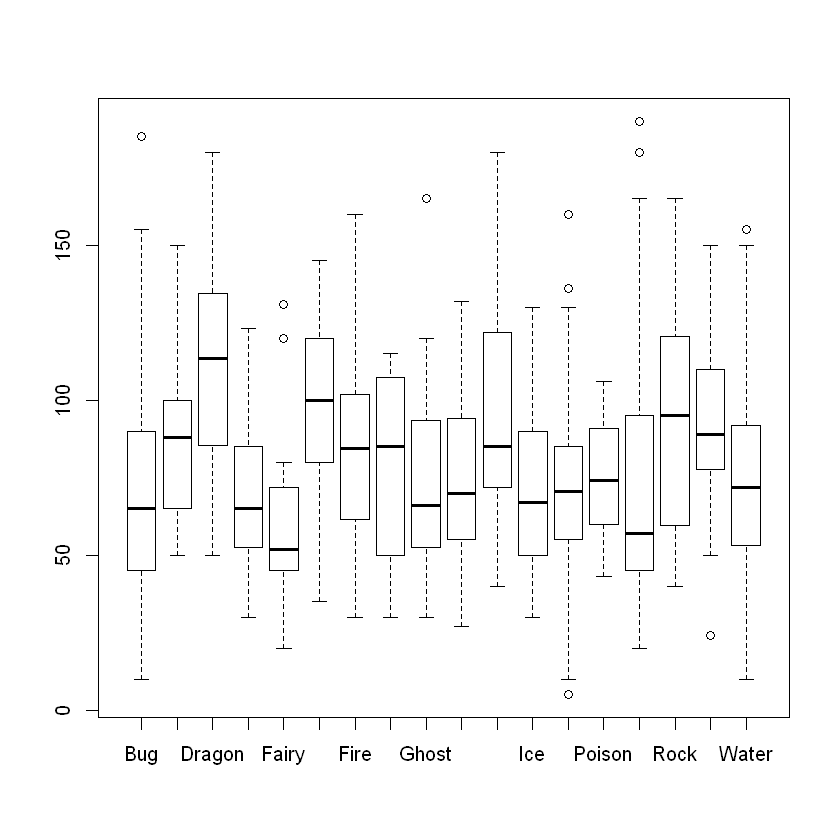

In [6]:
#Caractéristiques de chaque type
boxplot(pokemon$Attack~pokemon$Type.1)
table_cont<-table(pokemon$Type.1,pokemon$Legendary)

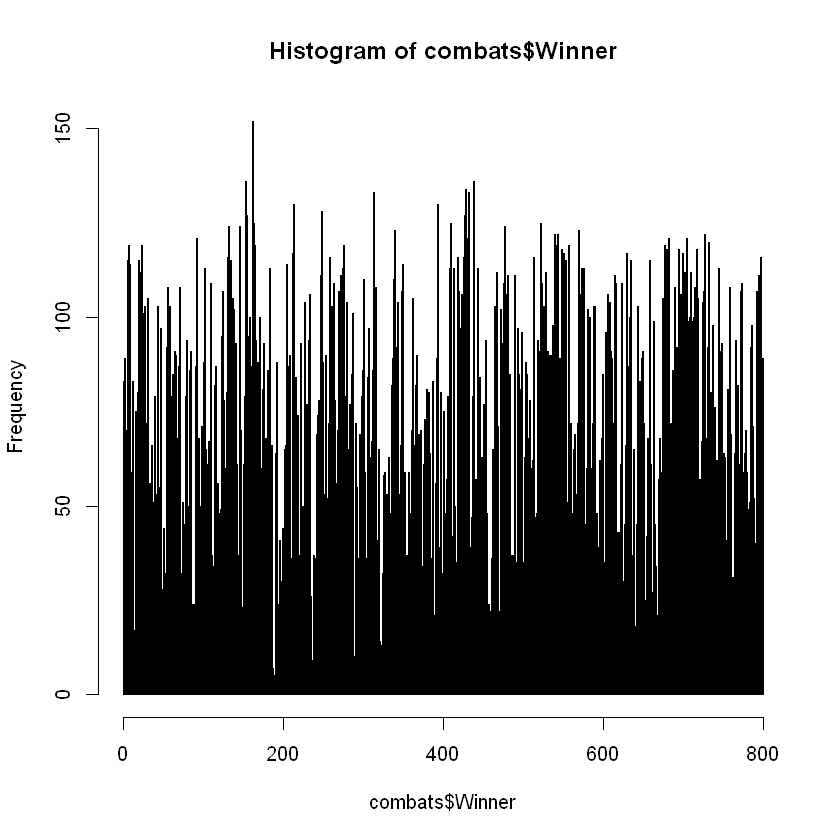

In [7]:
#Histogramme des winners
hist(combats$Winner,breaks=pokemon$X.)


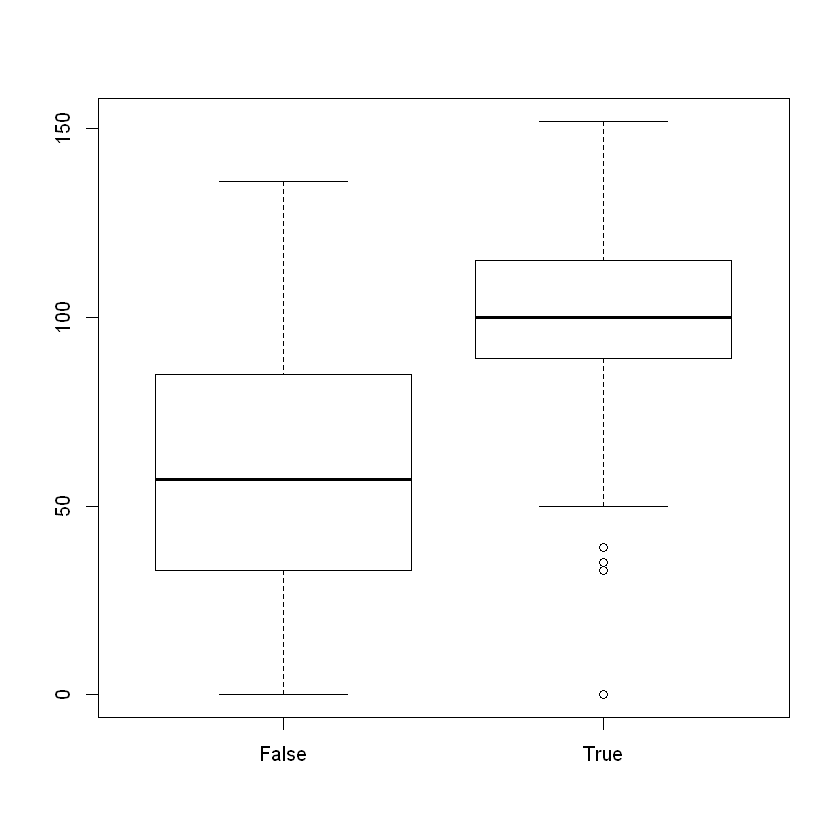

In [8]:
#Nombre de victores en fonctions du caractère "Legendary"
nb_victoire<-c()
nb_match<-c()
for (i in 1:length(pokemon$X.))
{
  nb_match[i]<-length(combats$First_pokemon[combats$First_pokemon==i])+length(combats$Second_pokemon[combats$Second_pokemon==i])
  nb_victoire[i]<- length(combats$Winner[combats$Winner==i])
}
boxplot(nb_victoire~pokemon$Legendary)


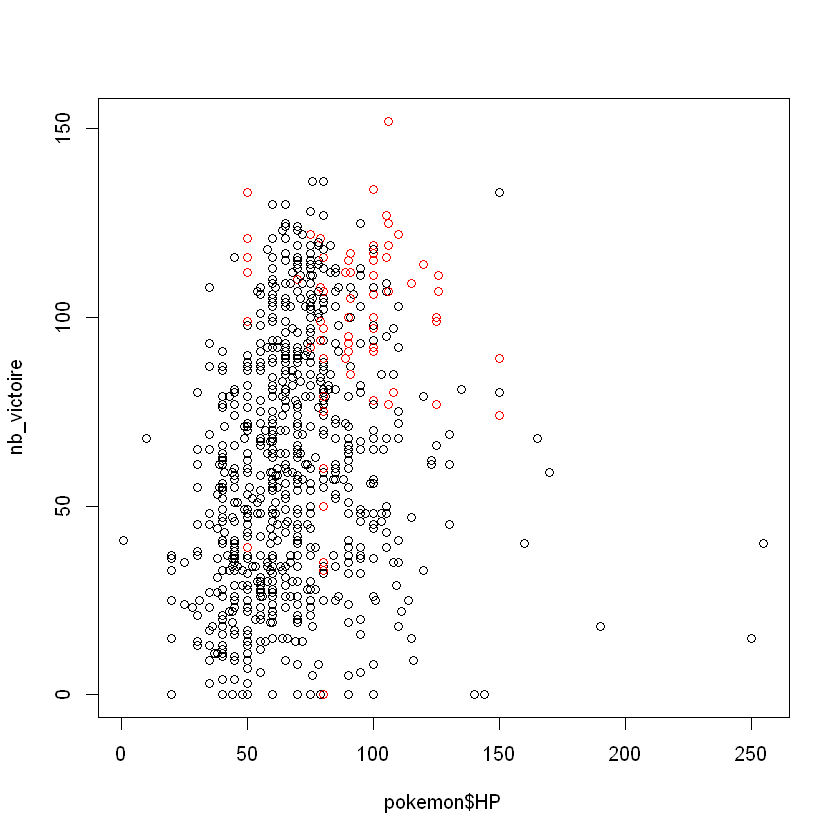

In [9]:
plot(pokemon$HP,nb_victoire,col=as.factor(pokemon$Legendary))

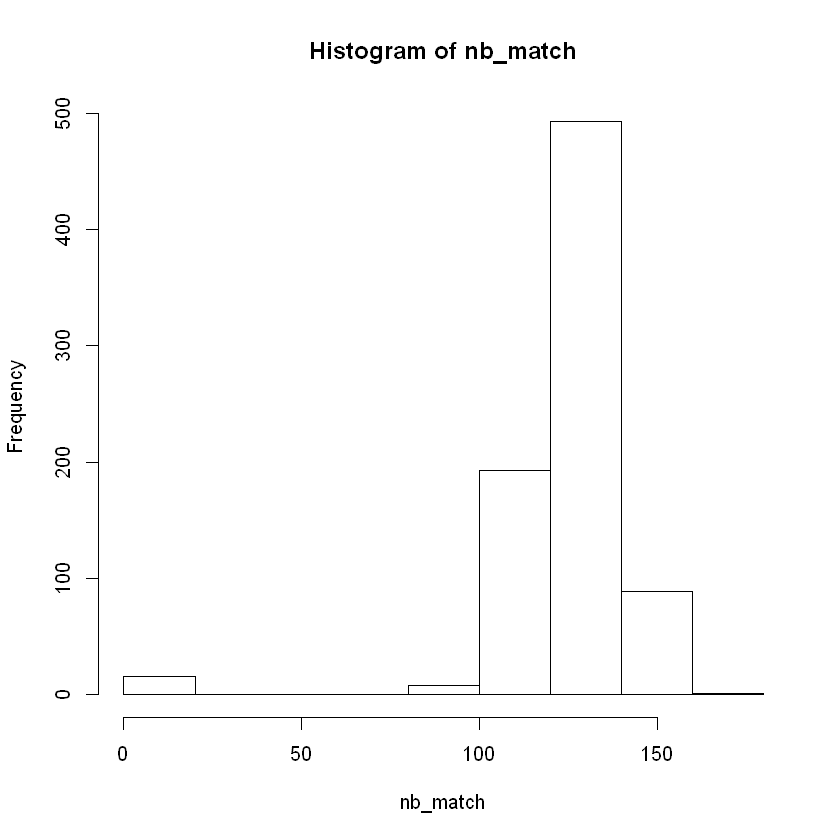

In [10]:
hist(nb_match)

In [11]:
Type_Combat<-c()
Type_Combat2<-c()
Type_Gagnant<-c()
for (i in 1:length(combats$First_pokemon))
{
  Type_Combat[c(i)]<- pokemon$Type.1[pokemon$X.==combats$First_pokemon[i]]
  Type_Combat2[c(i)]<- pokemon$Type.1[pokemon$X.==combats$Second_pokemon[i]]
  Type_Gagnant[c(i)]<-pokemon$Type.1[pokemon$X.==combats$Winner[i]]
  
  
}
Type_Analysis<-cbind(Type_Combat,Type_Combat2,Type_Gagnant)

In [12]:
HP_Combat<-c()
HP_Combat2<-c()
HP_Gagnant<-c()
for (i in 1:length(combats$First_pokemon))
{
  HP_Combat[c(i)]<- pokemon$HP[pokemon$X.==combats$First_pokemon[i]]
  HP_Combat2[c(i)]<- pokemon$HP[pokemon$X.==combats$Second_pokemon[i]]
  HP_Gagnant[c(i)]<-pokemon$HP[pokemon$X.==combats$Winner[i]]
}
Winner_Analysis<-cbind(HP_Combat,HP_Combat2,HP_Gagnant)
ratio = length(HP_Gagnant[HP_Gagnant>=HP_Combat&HP_Gagnant>=HP_Combat2])/length(HP_Gagnant)
print(ratio)

[1] 0.62396


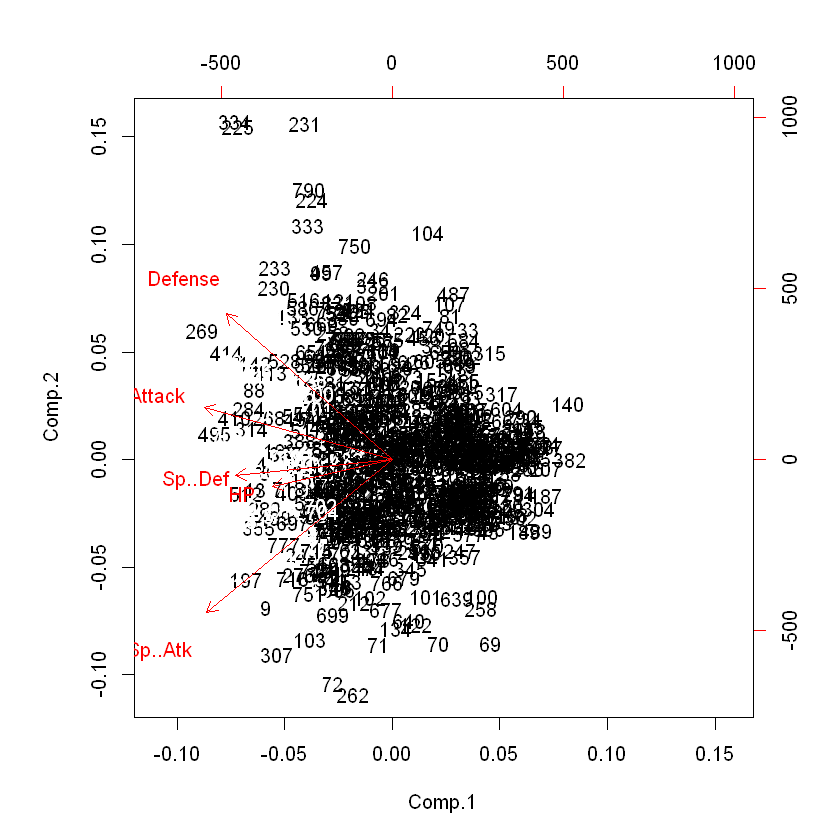

In [13]:
#ACP
pokemon.num<-pokemon[c(5,6,7,8,9)]
ACP<-princomp(pokemon.num)

a <- list(as.vector(as.numeric(!as.logical(pokemon$Legendary))),"red")
class(a) <- append(class(a),"myclass")
'[.myclass' <- function(x,i) x[[i]]

biplot(princomp(pokemon.num), col = a,choices=c(1,2)) 


Warning message:
"package 'FactoMineR' was built under R version 3.4.4"Warning message:
"package 'factoextra' was built under R version 3.4.4"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.4.4"Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 800 individuals, described by 5 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error o

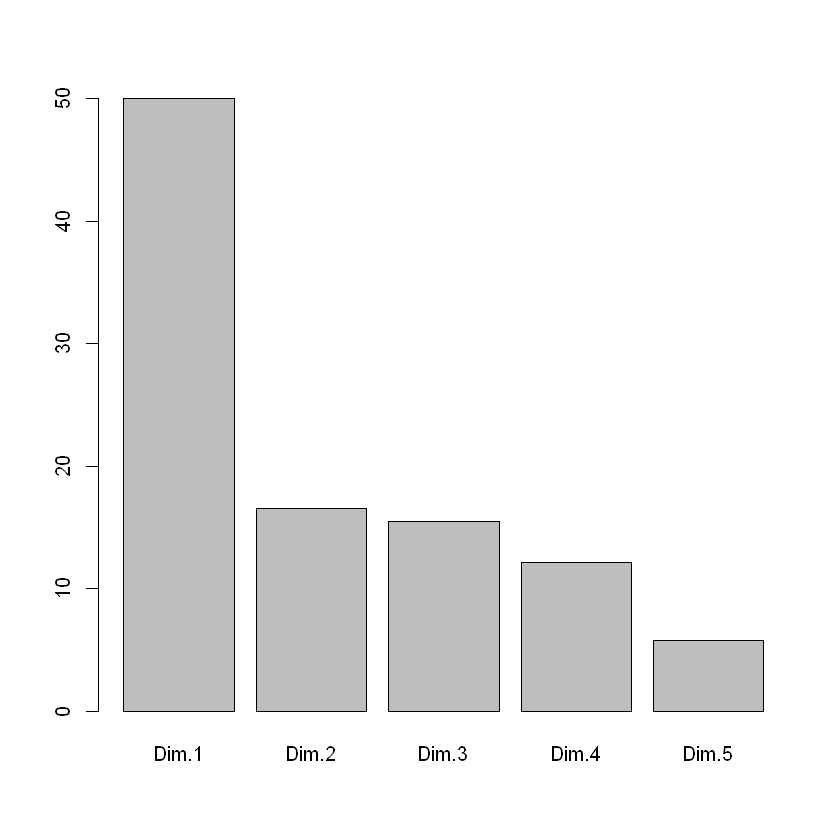

In [14]:
library("FactoMineR")
library("factoextra")
res<- PCA(pokemon.num, graph = FALSE)
print(res)
eig.val <- get_eigenvalue(res)
barplot(eig.val[,2]) #Contribution de chaque variables

Warning message in biplot.default(t(t(scores[, choices])/lam), t(t(x$loadings[, :
"NAs introduits lors de la conversion automatique"

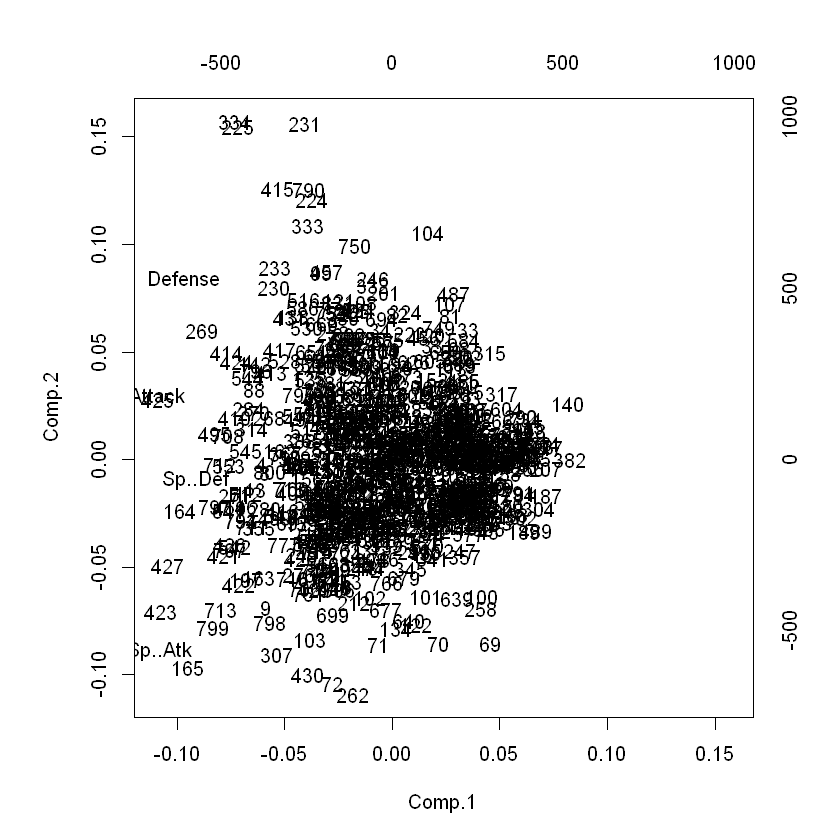

In [15]:
biplot(princomp(pokemon.num), choices=c(1,2), col = as.numeric(pokemon$Legendary))